## Real Estate price prediction

The real estate price prediction with linear regression model.

The term regression in predictive modeling generally refers to any modeling task that involves the prediction of a real number. As in correlation analysis in linear regression, it is assumed that an increase in one variable is accompanied by an increase or decrease in the other variable. The name linear regression refers to the fact that the regression function is a linear function, that is, y = ax + b.

Linear regression analysis aims to calculate such regression coefficients (coefficients in the linear model) that the model best predicts the value of the dependent variable, so that the estimation error is as small as possible. Therefore, the regression analysis "fits" such a simple one to the subjects (linear dependence), so that the model is the best (with the lowest possible random error).

#### Objective
We want to predict a real estate prices and since house price is a continuous variable we will use a regression models to solve our problem. 

#### Data
We used the Real Estate prices dataset that comes from Kaggle.

The data contains the following columns: 
- X1 transaction date 
- X2 house age 
- X3 distance to the nearest MRT station 
- X4 number of convenience stores  	
- X5 latitude 
- X6 longitud
- Y house price of unit area 

### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [2]:
real = pd.read_csv(r'C:\Python Scripts\Datasets\real_estate_prices\Real estate.csv', encoding = 'unicode_escape')
real.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
real.shape

(414, 8)

In [4]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Data cleaning
We have some unnecessary columns such as "No" and "X1 transaction date" so we remove them. We also change the name of columns. 

In [5]:
#delate unnecesary columns
real.drop(['No', 'X1 transaction date'],axis=1,inplace=True)
real.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


Checking null values:

In [6]:
real.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
#we rename columns:
real.rename({'X2 house age':'house age',
             'X3 distance to the nearest MRT station':'nearest_station',
             'X4 number of convenience stores':' number of stores',
             'X5 latitude':'latidude',
             'X6 longitude':'longitude',
             'Y house price of unit area':'house price'},axis='columns',inplace=True)

In [8]:
real.head()

,house age,nearest_station,number of stores,latidude,longitude,house price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### Exploratory Data Analysis
We create some simple plots to check out the data.

In [9]:
real.describe()

,house age,nearest_station,number of stores,latidude,longitude,house price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


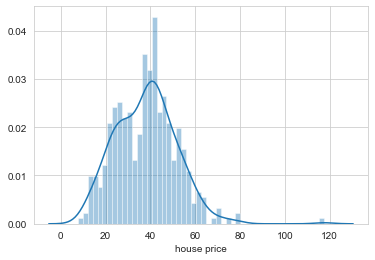

In [10]:
#distributions of house price column:

sns.set_style('whitegrid')
sns.distplot(real['house price'], bins=50);

**Correlation:**

In [10]:
corr = real.corr()
corr

,house age,nearest_station,number of stores,latidude,longitude,house price
house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
nearest_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number of stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latidude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


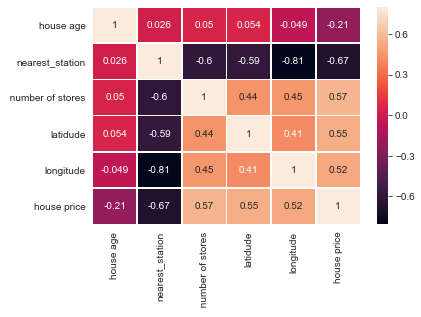

In [12]:
ax = sns.heatmap(corr, annot=True, linewidth=0.5, vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

Visualising all numeric variables:

<Figure size 432x864 with 0 Axes>

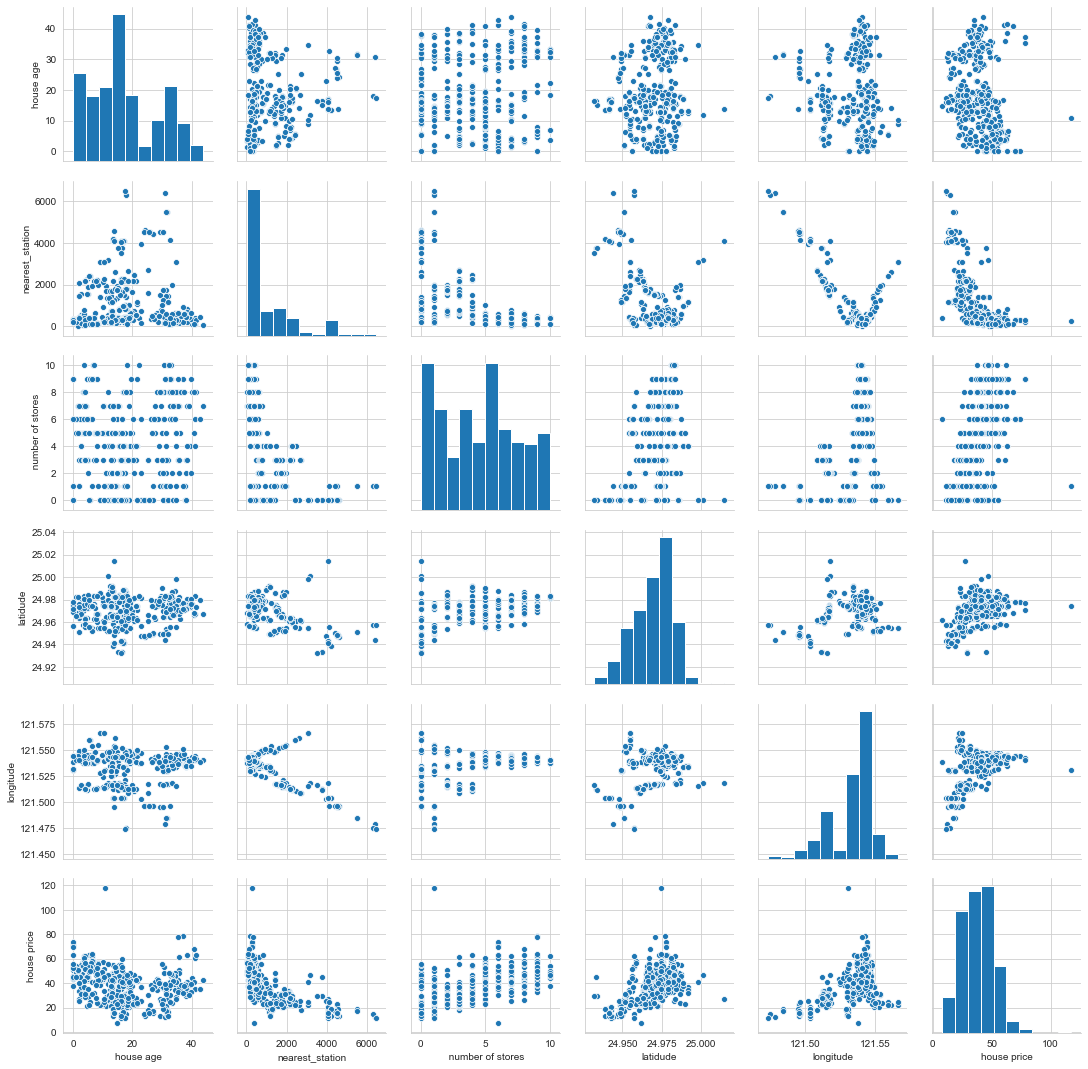

In [13]:
plt.figure(figsize=(6,12))
sns.pairplot(real)
plt.show()

### Data preparation

For train out regression model, first we need to split data set into target variable and features variable. Then we split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
X = real.drop(columns='house price')
y = real.loc[:, 'house price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

The feature values might have different scales. So, we convert them on the same scale for better analysis and prediction. We use a Standard Scaler function.

In [13]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#shape of data:
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

X_train_shape (331, 5)
X_test_shape (83, 5)
y_train_shape (331,)
y_test_shape (83,)


### Regression models

We will use different types of regression and see what works best for our problem. We test the common linear regression models (Ridge, Lasso, ElasticNet) and Random Forest, Gradient Descsent and XGBoosts models.

**Linear Regression**

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#predict:
model.predict(X_test)

array([41.39074736, 12.35535341, 41.10500538, 12.16895621, 40.36129482,
       40.21203093, 39.90350957, 33.92740341, 48.09570524, 44.57950542,
       45.26308421, 40.66444206, 40.78477523, 40.21749212, 48.74518601,
       35.91657562, 40.00691534, 42.35745366, 41.86569963, 43.59017015,
       52.18882516, 30.84586302, 41.18004243, 45.92763544, 47.42648181,
       44.57007288, 45.07409463, 28.60802815, 47.7063895 , 23.6266334 ,
       42.74811911, 32.97533133, 44.01115269, 36.22167431, 45.20658972,
       30.79286498, 47.69431739, 38.96980714, 54.02064039, 10.13388451,
       51.27619778, 34.14524774, 35.86076275, 47.99091306, 14.72230198,
       42.56968095, 44.59486895, 15.28641683, 32.70221413, 46.4451428 ,
       51.97683302, 41.2912592 , 49.08218174, 24.51339343, 30.87236204,
       35.78072881, 48.51144284, 40.50194892, 45.36908028, 33.08132741,
       42.26857641, 42.28763303, 39.65314646, 48.25469934, 39.06506932,
       30.05772358, 12.57066321, 32.8104548 , 48.69693596, 40.21

In [17]:
pred = model.predict(X_test)

***Evaluating Model performance***

Here are common evaluation metrics for regression problems:

- **R-Squared** (the coefficient of determination) is the proportion of variation that is explained by a linear model. In general, a higher R-squared value represents a better fit of the data.
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors.  Is a measure of the performance of the model.  It is a way of measuring how good our predictive model is against the actual data.  The lower the RMSE value, the better the model will perform.
- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors.
- **Mean Squared Error (MSE)** is the mean of the squared errors.


In [20]:
# R-Squared
print("r2_score:",r2_score(y_test,pred))
#Root mean squared error(RMSE)
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))
#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,pred))

r2_score: 0.6420691483643951
RMSE 7.884937261793149
MAE 5.745927475462509
MSE 62.172235622414036


We check the intercept and the slope of the model:

In [18]:
# print the intercept and coef:
print("intercept",model.intercept_)
print("coef_:",model.coef_)

intercept 37.97643504531784
coef_: [-2.99040174 -5.20873298  3.28501717  3.04635878 -0.01878808]


Let’s see what the test and predictive data look like:

In [21]:
df = pd.DataFrame({'Actual':y_test,'Predictions':pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
356,45.3,41.0
170,14.4,12.0
224,46.0,41.0
331,15.6,12.0
306,50.2,40.0


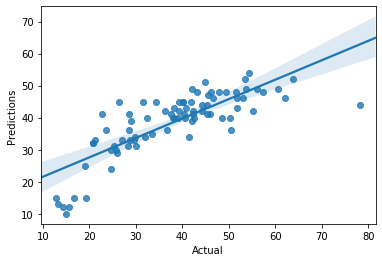

In [22]:
sns.regplot('Actual','Predictions',data=df)

**Ridge Regression**

Ridge regression is an extension of linear one. It uses the L2 regularization technique and reduces parameters, therefore it is mainly used to prevent multi-wedge. It also reduces the complexity of the model by shrinking the factor.

In [23]:
rg_model = Ridge(alpha=100, tol=0.0001, random_state=42)
rg_model.fit(X_train,y_train)

preds = rg_model.predict(X_test)

In [24]:
print("r2_score:",r2_score(y_test,preds))
print("RMSE",np.sqrt(mean_squared_error(y_test,preds)))

r2_score: 0.6176249429548037
RMSE 8.149734349882388


**LASSO Regression**

The Lasso method is another extension to linear regression and differs from Ridge regression in that the term regularization is in absolute value. It uses the L1 regularization technique and usually it is used when we have a lot of variables.

In [25]:
ls_model =  Lasso(alpha=5.1, positive=True, selection='random', random_state=42)
ls_model.fit(X_train,y_train)

pred_y = ls_model.predict(X_test)

In [26]:
print("r2_score:",r2_score(y_test,pred_y))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred_y)))

r2_score: 0.2764343296984122
RMSE 11.210827030757649


**Elastic Net**

Elastic Net regression is a combination the features of Ridge and Lasso, through the use of two types of norms, the significance of which is controlled by the parameter ρ. This combin allows for learning a rare model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

In [27]:
en_model = ElasticNet(alpha= 0.1, l1_ratio=0.9, selection='random', random_state=42)
en_model.fit(X_train,y_train)

y_pred = en_model.predict(X_test)

In [28]:
print("r2_score:",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.6404809308038952
RMSE 7.902411495548288


**Stochastic Gradient Descent**

Gradient Descent is a very overall optimization algorithm able to find optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [29]:
sg_model = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sg_model.fit(X_train,y_train)

predicted = sg_model.predict(X_test)

In [30]:
print("r2_score:",r2_score(y_test,predicted ))
print("RMSE",np.sqrt(mean_squared_error(y_test,predicted )))

r2_score: 0.6376828120306286
RMSE 7.933103926832212


**Random Forest**

We use also Random Forest model.

In [31]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)

predict = rf_model.predict(X_test)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
print("r2_score:",r2_score(y_test,predict))
print("RMSE",np.sqrt(mean_squared_error(y_test,predict)))

r2_score: 0.7245322545393535
RMSE 6.917259246087065


**Xgboost**

We try XGboost algorithm to check if we can get better results.

In [52]:
xb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, subsample=0.75,colsample_bytree=1, max_depth=7)
xb_model.fit(X_train,y_train)

preds_y = xb_model.predict(X_test)

In [53]:
print("r2_score:",r2_score(y_test,preds_y))
print("RMSE",np.sqrt(mean_squared_error(y_test,preds_y)))

r2_score: 0.6774845063586328
RMSE 7.484692571952221


**Hyperparameter tuning of Random Forest model**

Beacause the Random Forest model got the best result - the smallest RMSE (6,91) and the highest R-Squared (0.72) we may check if these results can be improved. So we use GridSearch to find the best hyperparameters of Random Forest model.

**GridSearch**

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

Hyperparameters:
- n_estimators:number of estimators,number of trees to fit;
- max_depth:depth level of each trees;
- min_samples_split:expresses the minimum number of observations in that node before a node is split.
   

In [33]:
params={'max_depth':list(range(1,10)),
        'n_estimators':[100,200,500,1000],
        'min_samples_split':[10, 30, 50, 50]}

In [34]:
grid = GridSearchCV(rf_model, params, cv=4, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9

In [35]:
#optimum parameter:
grid.best_params_

{'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}

Now we build final model with received best_params:

In [36]:
rf_grid = RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=100, random_state=42)
rf_grid.fit(X_train,y_train)

predict_y = rf_grid.predict(X_test)

In [37]:
print("r2_score:",r2_score(y_test,predict_y))
#Root mean squared error(RMSE)
print("RMSE",np.sqrt(mean_squared_error(y_test,predict_y)))
#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,predict_y))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,predict_y))

r2_score: 0.729727147802069
RMSE 6.851724428610872
MAE 4.867658825842442
MSE 46.94612764562299


In [38]:
df2 = pd.DataFrame({'Actual':y_test,'Predictions':predict_y})
df2['Predictions']= round(df2['Predictions'])
df2.head()

,Actual,Predictions
356,45.3,68.0
170,14.4,18.0
224,46.0,48.0
331,15.6,19.0
306,50.2,36.0


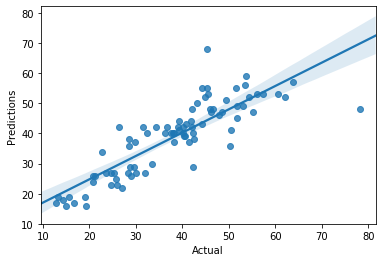

In [39]:
sns.regplot('Actual','Predictions',data=df2)

**Significance of variables**

We can also check importance of variables in our best model.

The significance according to dependent variable:

In [47]:
Importance = pd.DataFrame({"Importance": rf_grid.feature_importances_}, index = X.columns)
Importance

,Importance
house age,0.163957
nearest_station,0.617407
number of stores,0.012353
latidude,0.111284
longitude,0.094999


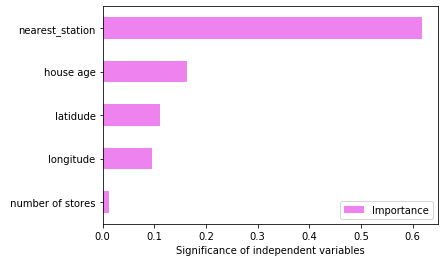

In [48]:
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh", color = "violet")
plt.xlabel("Significance of independent variables")
plt.show()

It can be seen that the most important variable in our analysis is nearest station.

### Summary

In this project we used several linear regression algorithms for real estate price prediction. We used the common linear regression models (Ridge, Lasso, ElasticNet), Random Forest, Gradient Descsent and XGBoosts models. Our the best model turned out to be a Random Forest model. We achived the smallest RMSE (6,91) and the highest R-Squared (0.72). We also used GridSearch to find the best hyperparameters of Random Forest model and to check it that results can be improved. By virtue of them methods we got slightly better results - the RMSE (6,85) and the R-Squared (0.73). Additionally the most significance variable in our analysis is "nearest station".